In [3]:
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/18wyCTVAbd4W91vcGURS0P5ax-dI93iq2w7-s7wj98bs/export?format=csv&gid=1823224578'
df = pd.read_csv ('https://docs.google.com/spreadsheets/d/18wyCTVAbd4W91vcGURS0P5ax-dI93iq2w7-s7wj98bs/export?format=csv&gid=1823224578')


In [4]:
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,Pixel Odyssey 2,Action,PlayStation,2024,Square Enix,1847.58,44.96,14.07,87,Yes,Declining
1,Battle Warriors 4,Strategy,Cross-Platform,2024,EA,4835.79,115.65,56.27,92,Yes,Stable
2,Legends of Valor 2,Shooter,Xbox,2024,Square Enix,2628.55,169.67,74.74,99,No,Declining
3,Shadow Realms 4,Action,Nintendo Switch,2024,Microsoft,1695.50,184.40,20.15,73,Yes,Stable
4,Cyber Quest 2,Adventure,Xbox,2024,Microsoft,4529.75,17.28,5.83,91,Yes,Stable


In [5]:
df.dtypes

Game Title                  object
Genre                       object
Platform                    object
Release Year                object
Developer                   object
Revenue (Millions $)       float64
Players (Millions)         float64
Peak Concurrent Players    float64
Metacritic Score             int64
Esports Popularity          object
Trending Status             object
dtype: object

In [6]:
# converting to correct type
df['Revenue (Millions $)'] = df['Revenue (Millions $)'].astype(float)

In [7]:
df.dtypes

Game Title                  object
Genre                       object
Platform                    object
Release Year                object
Developer                   object
Revenue (Millions $)       float64
Players (Millions)         float64
Peak Concurrent Players    float64
Metacritic Score             int64
Esports Popularity          object
Trending Status             object
dtype: object

# Format data regex 

In [8]:
import re

In [9]:
def clean_string_content(text):
    if pd.isna(text):
        return text
    text = str(text)
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s.]+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    return text


In [10]:
text_cols = df.select_dtypes(include="object").columns

In [11]:
df[text_cols] = df[text_cols].applymap(clean_string_content)

C:\Users\ptpsy\AppData\Local\Temp\ipykernel_8248\367378753.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[text_cols] = df[text_cols].applymap(clean_string_content)


In [12]:
df = df.applymap(clean_string_content)


C:\Users\ptpsy\AppData\Local\Temp\ipykernel_8248\4187115134.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_string_content)


In [13]:
df.head()


,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status
0,pixel odyssey 2,action,playstation,2024,square enix,1847.58,44.96,14.07,87,yes,declining
1,battle warriors 4,strategy,cross platform,2024,ea,4835.79,115.65,56.27,92,yes,stable
2,legends of valor 2,shooter,xbox,2024,square enix,2628.55,169.67,74.74,99,no,declining
3,shadow realms 4,action,nintendo switch,2024,microsoft,1695.5,184.4,20.15,73,yes,stable
4,cyber quest 2,adventure,xbox,2024,microsoft,4529.75,17.28,5.83,91,yes,stable


In [14]:
df['Revenue (Millions $)'] = pd.to_numeric(df['Revenue (Millions $)'], errors='coerce')

# Which genres (e.g., action, sports, RPG, family) generate the highest average and total revenue by platform?

In [15]:
genre_revenue = df.groupby(['Platform', 'Genre']).agg({
    'Revenue (Millions $)': ['sum', 'mean']
}).reset_index()

In [16]:
genre_revenue.columns = ['Platform', 'Genre', 'Total_Revenue', 'Average_Revenue']

In [17]:
genre_revenue[['Total_Revenue', 'Average_Revenue']] = genre_revenue[['Total_Revenue', 'Average_Revenue']].round(2)
genre_revenue = genre_revenue.sort_values(by='Total_Revenue', ascending=False)
print(genre_revenue)

           Platform       Genre  Total_Revenue  Average_Revenue
9    cross platform    strategy       63749.17          2549.97
51             xbox   adventure       63039.65          2740.85
29  nintendo switch    strategy       61813.02          2809.68
32               pc    fighting       61438.32          2559.93
48      playstation      sports       61317.60          2358.37
52             xbox    fighting       56639.95          2981.05
20  nintendo switch      action       56370.00          2684.29
44      playstation      racing       55937.87          2663.71
18           mobile      sports       54351.47          2470.52
0    cross platform      action       53490.93          2431.41
39               pc    strategy       53220.83          2534.33
27  nintendo switch  simulation       52701.85          3293.87
35               pc         rpg       52540.26          2918.90
10           mobile      action       51958.20          2361.74
6    cross platform     shooter       50

# Overall, what is the correlation between Metacritic critic score and revenue?

In [18]:
correlation = df['Metacritic Score'].corr(df['Revenue (Millions $)'])
print(correlation)


0.015594655811296102


In [19]:
import matplotlib.pyplot as plt

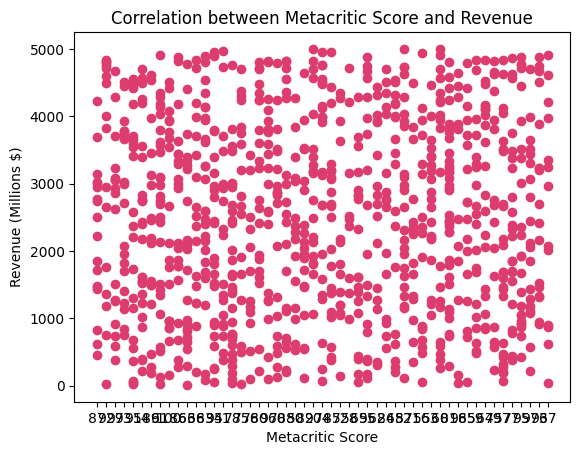

In [20]:
plt.scatter(df['Metacritic Score'], df['Revenue (Millions $)'], c='#dd3d6e')
plt.xlabel('Metacritic Score')
plt.ylabel('Revenue (Millions $)')
plt.title('Correlation between Metacritic Score and Revenue')
plt.show()

In [21]:
import seaborn as sns

In [22]:
df['Metacritic Score'] = df['Metacritic Score'].astype(float)
df['Revenue (Millions $)'] = df['Revenue (Millions $)'].astype(float)

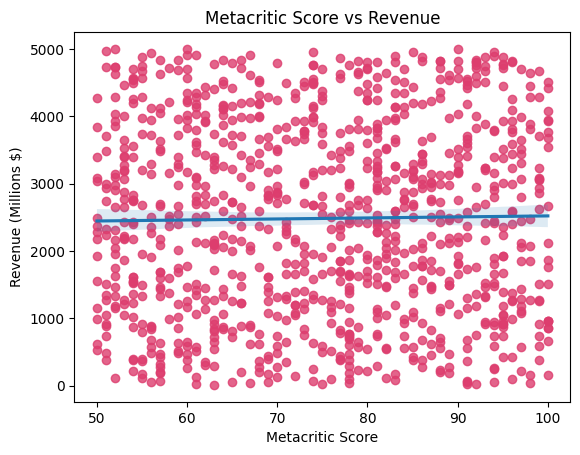

In [23]:
sns.regplot(x='Metacritic Score', y='Revenue (Millions $)', data=df, scatter_kws={'color': '#dd3d6e'})
plt.title('Metacritic Score vs Revenue')
plt.show()

# Is there a “threshold” score (for example, above 80) after which median revenue increases sharply? We are putting the scores in bins like 0–69, 70–79, 80–89, 90+.​


In [24]:
bins = [0, 69, 79, 89, 100]
labels = ['0-69', '70-79', '80-89', '90+']

In [25]:
df['Score_Bin'] = pd.cut(df['Metacritic Score'], bins=bins, labels=labels, right=True)

In [26]:
df.head()

,Game Title,Genre,Platform,Release Year,Developer,Revenue (Millions $),Players (Millions),Peak Concurrent Players,Metacritic Score,Esports Popularity,Trending Status,Score_Bin
0,pixel odyssey 2,action,playstation,2024,square enix,1847.58,44.96,14.07,87.0,yes,declining,80-89
1,battle warriors 4,strategy,cross platform,2024,ea,4835.79,115.65,56.27,92.0,yes,stable,90+
2,legends of valor 2,shooter,xbox,2024,square enix,2628.55,169.67,74.74,99.0,no,declining,90+
3,shadow realms 4,action,nintendo switch,2024,microsoft,1695.50,184.4,20.15,73.0,yes,stable,70-79
4,cyber quest 2,adventure,xbox,2024,microsoft,4529.75,17.28,5.83,91.0,yes,stable,90+


In [27]:
median_revenue_by_bin = df.groupby('Score_Bin')['Revenue (Millions $)'].median().reset_index()

print(median_revenue_by_bin)

  Score_Bin  Revenue (Millions $)
0      0-69              2496.760
1     70-79              2241.105
2     80-89              2588.840
3       90+              2577.560


C:\Users\ptpsy\AppData\Local\Temp\ipykernel_8248\649818765.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_revenue_by_bin = df.groupby('Score_Bin')['Revenue (Millions $)'].median().reset_index()


In [28]:
import numpy as np

C:\Users\ptpsy\AppData\Local\Temp\ipykernel_8248\1990082516.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


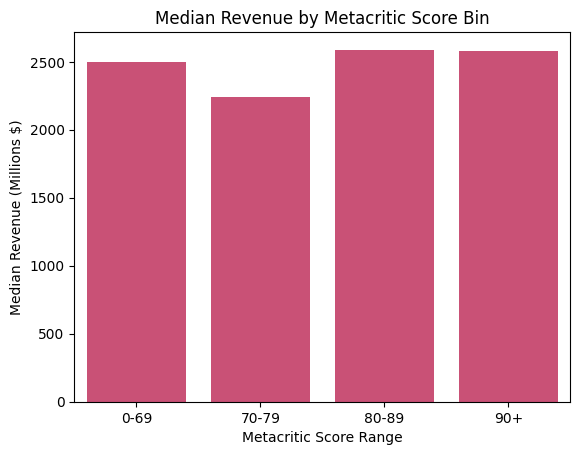

In [29]:
sns.barplot(
    x='Score_Bin',
    y='Revenue (Millions $)',
    data=df,
    estimator=np.median,
    ci=None, color='#dd3d6e'
)

plt.title('Median Revenue by Metacritic Score Bin')
plt.ylabel('Median Revenue (Millions $)')
plt.xlabel('Metacritic Score Range')
plt.show()

In [30]:
high_score_games = df[df['Metacritic Score'] > 80]
companies_above_80 = high_score_games['Developer'].unique()
company_counts = high_score_games['Developer'].value_counts()
print(company_counts)

Developer
sony            47
microsoft       46
rockstar        45
square enix     44
capcom          44
ubisoft         39
activision      37
ea              35
bandai namco    34
nintendo        32
Name: count, dtype: int64


end day 2